In [39]:
# Import here
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [40]:
# Pull data here
popData = pd.read_csv("texasPopData.csv")
popData.shape

(253599, 284)

In [41]:
houseData = pd.read_csv("texasHousingData.csv")
houseData.shape

(113080, 232)

In [42]:
x86 = popData.merge(houseData, left_on = 'SERIALNO', right_on = 'SERIALNO', how = 'inner')
x86.head()

,Unnamed: 0_x,RT_x,SERIALNO,SPORDER,PUMA_x,ST_x,ADJINC_x,PWGTP,AGEP,CIT,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,994880,P,13,1,5301,48,1007549,77,35,1,...,74,82,83,132,91,23,67,20,21,75
1,994881,P,13,2,5301,48,1007549,73,35,1,...,74,82,83,132,91,23,67,20,21,75
2,994882,P,13,3,5301,48,1007549,77,7,1,...,74,82,83,132,91,23,67,20,21,75
3,994883,P,13,4,5301,48,1007549,77,6,1,...,74,82,83,132,91,23,67,20,21,75
4,994884,P,17,1,4503,48,1007549,136,36,3,...,149,74,138,36,100,35,61,52,25,97


170919


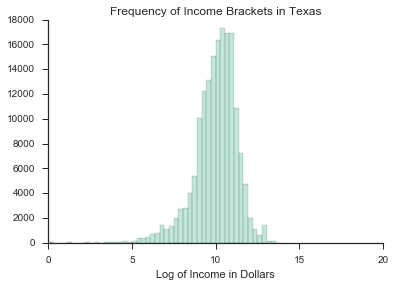

In [43]:
# Adjust incomes without weights
newIncomes = x86['PINCP']
newIncomes = newIncomes.dropna()
newIncomes = newIncomes [newIncomes > 0] # ignoring incomes of 0
newIncomes2 = np.log(newIncomes.values)
print(newIncomes2.size)

fig = plt.figure()
temp = fig.add_subplot(111) 
temp.set_title('Frequency of Income Brackets in Texas')
temp.set_xlim(0, 20)

sns.distplot(newIncomes2, kde=False, bins=50, ax = temp, axlabel = "Log of Income in Dollars")
sns.despine()

In [44]:
data = x86.copy()
data = data[data['ESR'].isin([1, 4])]
data.head()

,Unnamed: 0_x,RT_x,SERIALNO,SPORDER,PUMA_x,ST_x,ADJINC_x,PWGTP,AGEP,CIT,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,994880,P,13,1,5301,48,1007549,77,35,1,...,74,82,83,132,91,23,67,20,21,75
1,994881,P,13,2,5301,48,1007549,73,35,1,...,74,82,83,132,91,23,67,20,21,75
4,994884,P,17,1,4503,48,1007549,136,36,3,...,149,74,138,36,100,35,61,52,25,97
5,994885,P,18,1,3602,48,1007549,90,37,5,...,91,22,151,102,103,105,24,154,122,133
6,994886,P,18,2,3602,48,1007549,175,18,1,...,91,22,151,102,103,105,24,154,122,133


In [45]:
#rntp, valp, rmsp, taxp(?), smocp, bdsp(not as good), smp(okay)
features = ['PINCP', 'AGEP', 'MAR', 'SCHL', 'SEX', 'FOD1P', 'INDP', 'NATIVITY', 'OCCP', 'RAC1P', 'RMSP', 'SMOCP', 'RNTP', 'VALP']
newData = data.copy()
newData = data[features]
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP
0,27000,35,1,16,1,NaN,8680,1,4110,1,6,1276,NaN,120000
1,53000,35,1,21,2,3301,7870,1,136,1,6,1276,NaN,120000
4,30000,36,5,21,2,6201,8560,1,2740,9,10,NaN,600,NaN
5,26000,37,4,10,2,NaN,8680,2,4010,1,6,743,NaN,20000
6,1500,18,5,14,2,NaN,8680,1,4150,1,6,743,NaN,20000


In [46]:
totalRich = newData[newData['PINCP']>=100000]
print(totalRich.shape)

(12546, 14)


In [47]:
smocpNP = newData['SMOCP'].as_matrix()
smocpAverage = np.nanmean(smocpNP)
print(smocpAverage)

rmspNP = newData['RMSP'].as_matrix()
rmspAverage = np.nanmean(rmspNP)
print(rmspAverage)

rntpNP = newData['RNTP'].as_matrix()
rntpAverage = np.nanmean(rntpNP)
print(rntpAverage)

valpNP = newData['VALP'].as_matrix()
valpAverage = np.nanmean(valpNP)
print(valpAverage)

1281.89229502
6.1881809838
826.427000131
189094.374606


In [48]:
newData['FOD1P'].fillna(0, inplace=True)
newData['INDP'].fillna(0, inplace=True)
newData['OCCP'].fillna(0, inplace=True)
newData['SMOCP'].fillna(smocpAverage, inplace=True)
newData['RMSP'].fillna(rmspAverage, inplace=True)
newData['RNTP'].fillna(rntpAverage, inplace=True)
newData['VALP'].fillna(0, inplace=True)
newData.head()

/Users/qldo18/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP
0,27000,35,1,16,1,0,8680,1,4110,1,6,1276.000000,826.427,120000
1,53000,35,1,21,2,3301,7870,1,136,1,6,1276.000000,826.427,120000
4,30000,36,5,21,2,6201,8560,1,2740,9,10,1281.892295,600.000,0
5,26000,37,4,10,2,0,8680,2,4010,1,6,743.000000,826.427,20000
6,1500,18,5,14,2,0,8680,1,4150,1,6,743.000000,826.427,20000


In [49]:
newData['MONTHLYCOSTS'] = newData.SMOCP + newData.RNTP
newData.head()

/Users/qldo18/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,SMOCP,RNTP,VALP,MONTHLYCOSTS
0,27000,35,1,16,1,0,8680,1,4110,1,6,1276.000000,826.427,120000,2102.427000
1,53000,35,1,21,2,3301,7870,1,136,1,6,1276.000000,826.427,120000,2102.427000
4,30000,36,5,21,2,6201,8560,1,2740,9,10,1281.892295,600.000,0,1881.892295
5,26000,37,4,10,2,0,8680,2,4010,1,6,743.000000,826.427,20000,1569.427000
6,1500,18,5,14,2,0,8680,1,4150,1,6,743.000000,826.427,20000,1569.427000


In [50]:
del newData['SMOCP']
del newData['RNTP']
newData.head()

,PINCP,AGEP,MAR,SCHL,SEX,FOD1P,INDP,NATIVITY,OCCP,RAC1P,RMSP,VALP,MONTHLYCOSTS
0,27000,35,1,16,1,0,8680,1,4110,1,6,120000,2102.427000
1,53000,35,1,21,2,3301,7870,1,136,1,6,120000,2102.427000
4,30000,36,5,21,2,6201,8560,1,2740,9,10,0,1881.892295
5,26000,37,4,10,2,0,8680,2,4010,1,6,20000,1569.427000
6,1500,18,5,14,2,0,8680,1,4150,1,6,20000,1569.427000


In [51]:
#del newData['SCHL']
#del newData['FOD1P']
#xs = newData.values
#corr = np.corrcoef(xs, rowvar=0)
#w, v = np.linalg.eig(corr)
#w

In [52]:
mar_dummies = pd.get_dummies(newData.MAR, prefix="MAR")
newData = newData.join(mar_dummies)
del newData['MAR']

schl_dummies = pd.get_dummies(newData.SCHL, prefix="SCHL")
newData = newData.join(schl_dummies)
del newData['SCHL']

sex_dummies = pd.get_dummies(newData.SEX, prefix="SEX")
newData = newData.join(sex_dummies)
del newData['SEX']

#newData['FOD1P'].fillna(0, inplace=True)
newData['FOD1P'] = newData['FOD1P'].apply(lambda x: int(x/100))
fod_dummies = pd.get_dummies(newData.FOD1P, prefix="FOD1P")
newData = newData.join(fod_dummies)
del newData['FOD1P']

#newData['INDP'].fillna(0, inplace=True)
newData['INDP'] = newData['INDP'].apply(lambda x: int(x/100))
indp_dummies = pd.get_dummies(newData.INDP, prefix="INDP")
newData = newData.join(indp_dummies)
del newData['INDP']

nat_dummies = pd.get_dummies(newData.NATIVITY, prefix="NATIVITY")
newData = newData.join(nat_dummies)
del newData['NATIVITY']

#newData['OCCP'].fillna(0, inplace=True)
newData['OCCP'] = newData['OCCP'].apply(lambda x: int(x/100))
occp_dummies = pd.get_dummies(newData.OCCP, prefix="OCCP")
newData = newData.join(occp_dummies)
del newData['OCCP']

rac_dummies = pd.get_dummies(newData.RAC1P, prefix="RAC1P")
newData = newData.join(rac_dummies)
del newData['RAC1P']
newData.head()

,PINCP,AGEP,RMSP,VALP,MONTHLYCOSTS,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,...,OCCP_98,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9
0,27000,35,6,120000,2102.427000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,53000,35,6,120000,2102.427000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,30000,36,10,0,1881.892295,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,26000,37,6,20000,1569.427000,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,1500,18,6,20000,1569.427000,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [53]:
newData['PINCP_100000'] = newData.PINCP > 100000
del newData['PINCP']
newData.head()

,AGEP,RMSP,VALP,MONTHLYCOSTS,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,SCHL_1.0,...,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,PINCP_100000
0,35,6,120000,2102.427000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,False
1,35,6,120000,2102.427000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,False
4,36,10,0,1881.892295,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,False
5,37,6,20000,1569.427000,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,False
6,18,6,20000,1569.427000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,False


In [54]:
len(newData.columns)

276

In [55]:
y = newData.PINCP_100000
del newData['PINCP_100000']

In [56]:
def plot_roc(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Below 100000', 'Above 100000'], rotation=45)
    plt.yticks(tick_marks, ['Below 100000', 'Above 100000'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def accuracies(cm):
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    print("Below 100000 Acc: {0}".format(no_acc))
    print("Above 100000 Acc: {0}".format(yes_acc))
    print("Avg Acc: {0}".format((no_acc + yes_acc)/2))
    

def run_model(model):
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm)
    accuracies(cm)

In [57]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.33, random_state=42)

[[23235  9697]
 [ 1068  2715]]
Below 100000 Acc: 0.7055447588971213
Above 100000 Acc: 0.7176843774781919
Avg Acc: 0.7116145681876567


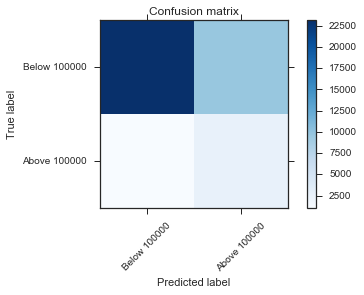

In [58]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(penalty='l2', C=1000, class_weight='balanced')
run_model(clf)

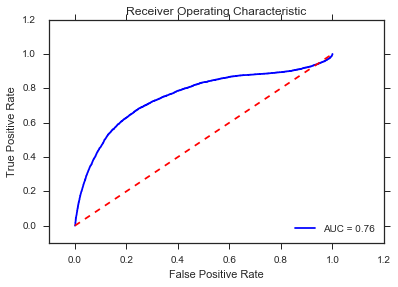

In [59]:
from sklearn.metrics import roc_curve, auc
plot_roc(clf)

[[23235  9697]
 [ 1068  2715]]
Below 100000 Acc: 0.7055447588971213
Above 100000 Acc: 0.7176843774781919
Avg Acc: 0.7116145681876567
{'C': 0.001}


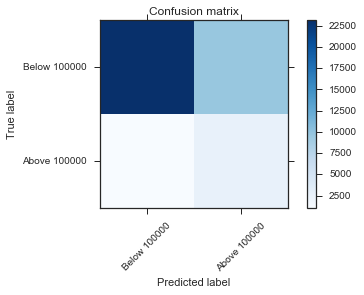

In [60]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def cm_loss(estimator, X, y):
    predictions = estimator.predict(X)
    cm = confusion_matrix(y, predictions)
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    return (no_acc + yes_acc)/2


lr = LogisticRegression(penalty='l2', class_weight='balanced')
parameters = {'C':[.001, .01, 1, 10, 100]}
clf = GridSearchCV(lr, parameters, scoring=cm_loss, cv=7)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)
print(clf.best_params_)

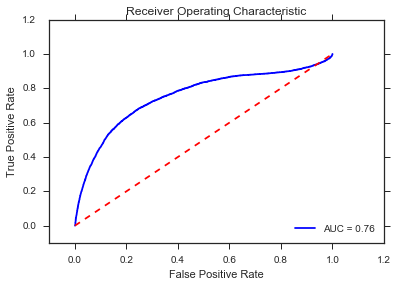

In [61]:
plot_roc(clf.best_estimator_)

[[27438  5494]
 [  596  3187]]
Below 100000 Acc: 0.8331713834568201
Above 100000 Acc: 0.8424530795664816
Avg Acc: 0.8378122315116509
{'C': 1}


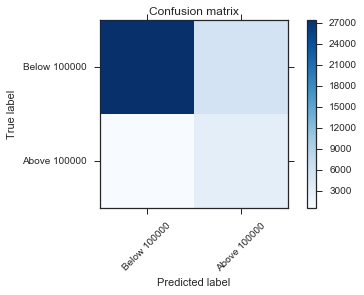

In [96]:
lr = LogisticRegression(penalty='l1', class_weight='balanced')
parameters = {'C':[.001, .01, 1, 10, 100, 1000]}
clf = GridSearchCV(lr, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)
print(clf.best_params_)

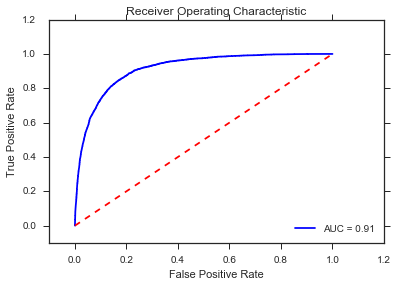

In [97]:
plot_roc(clf.best_estimator_)

## LDA AND QDA

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

[[31668  1264]
 [ 1874  1909]]
Below 100000 Acc: 0.9616178792663671
Above 100000 Acc: 0.5046259582342056
Avg Acc: 0.7331219187502864
{'tol': 0.001}


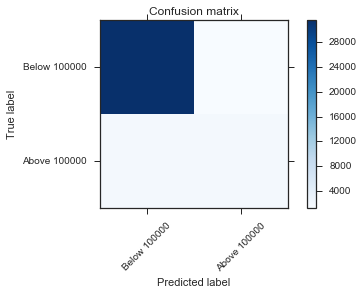

In [71]:
ldaModel = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage='auto')
parameters = {'tol':[0.001]}
clf2 = GridSearchCV(ldaModel, parameters, scoring=cm_loss, cv=5)
clf2.fit(X_train, y_train)
run_model(clf2.best_estimator_)
print(clf2.best_params_)

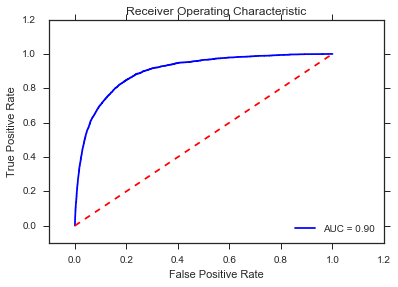

In [72]:
plot_roc(clfLda.best_estimator_)

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables ar

[[26150  6782]
 [ 1092  2691]]
Below 100000 Acc: 0.7940604882788777
Above 100000 Acc: 0.711340206185567
Avg Acc: 0.7527003472322223
{'reg_param': 0.9}


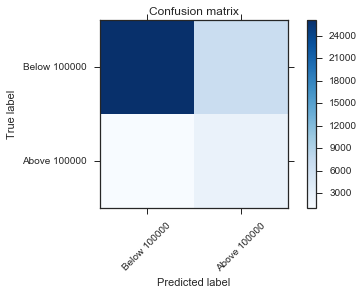

In [74]:
qdaModel = QuadraticDiscriminantAnalysis()
parameters = {'reg_param':[0.9]} #0.9 is optimal
clf3 = GridSearchCV(qdaModel, parameters, scoring=cm_loss, cv=5)
clf3.fit(X_train, y_train)
run_model(clf3.best_estimator_)
print(clf3.best_params_)

/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


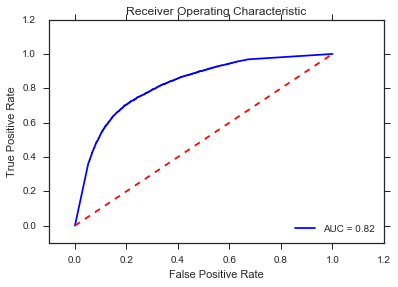

In [75]:
plot_roc(qdaClf.best_estimator_)

In [76]:
from sklearn.svm import SVC

In [77]:
mod = SVC(max_iter=10000, kernel = 'poly', degree = 3, class_weight='balanced')

[[  413 32519]
 [  485  3298]]
Below 100000 Acc: 0.012540993562492409
Above 100000 Acc: 0.8717948717948718
Avg Acc: 0.4421679326786821


/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


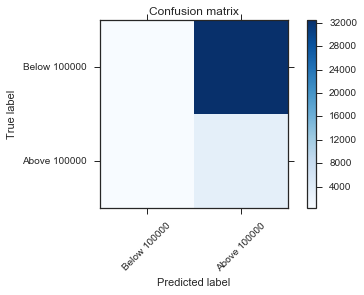

In [78]:
run_model(mod)

In [79]:
mod = SVC(max_iter=20000, kernel = 'poly', degree = 3, class_weight='balanced')

[[32439   493]
 [ 3216   567]]
Below 100000 Acc: 0.9850297582898093
Above 100000 Acc: 0.14988104678826328
Avg Acc: 0.5674554025390363


/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


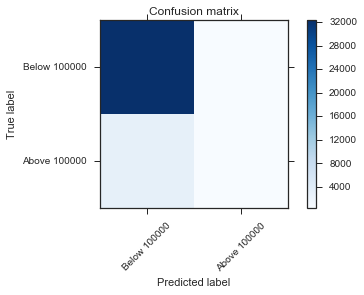

In [80]:
run_model(mod)

In [81]:
mod = SVC(max_iter=30000, kernel = 'poly', degree = 3, coef0 = 1, class_weight='balanced')

[[30879  2053]
 [ 2283  1500]]
Below 100000 Acc: 0.9376594194096927
Above 100000 Acc: 0.3965107057890563
Avg Acc: 0.6670850625993745


/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


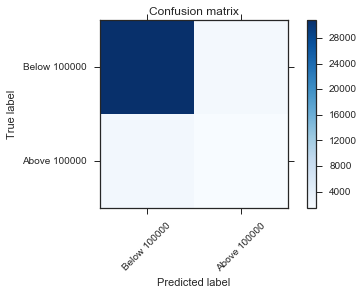

In [82]:
run_model(mod)

In [83]:
from sklearn.linear_model import SGDClassifier

In [84]:
mod = SGDClassifier(n_jobs=-1, shuffle=True, penalty = 'l2', class_weight='balanced', average=1)
parameters = {'l1_ratio':[0.85], 'alpha':[3.5],'eta0':[1.5], 'power_t':[3.5]}

[[10881 22051]
 [  410  3373]]
Below 100000 Acc: 0.3304081136888133
Above 100000 Acc: 0.8916204070843247
Avg Acc: 0.6110142603865689
SGDClassifier(alpha=3.5, average=1, class_weight='balanced', epsilon=0.1,
       eta0=1.5, fit_intercept=True, l1_ratio=0.85,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=3.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


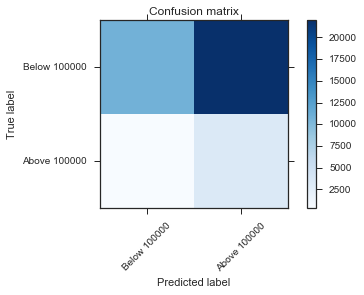

In [87]:
clf4 = GridSearchCV(mod, parameters, scoring=cm_loss, cv=5)
clf4.fit(X_train, y_train)
run_model(clf4.best_estimator_)
print(clf4.best_estimator_)

In [88]:
#plot_roc(clf)

/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables ar

[[29486  3446]
 [ 1066  2717]]
Below 100000 Acc: 0.8953601360378963
Above 100000 Acc: 0.718213058419244
Avg Acc: 0.8067865972285702


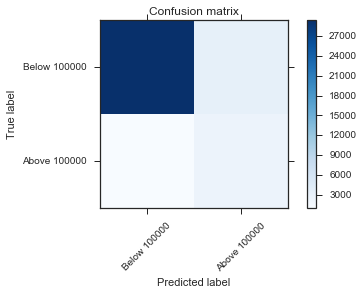

In [89]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', clf), ('lda', clf2), ('qda', clf3)], voting='hard')
eclf.fit(X_train, y_train)
run_model(eclf)

/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables ar

[[29895  3037]
 [ 1187  2596]]
Below 100000 Acc: 0.9077796671930037
Above 100000 Acc: 0.6862278614855934
Avg Acc: 0.7970037643392986


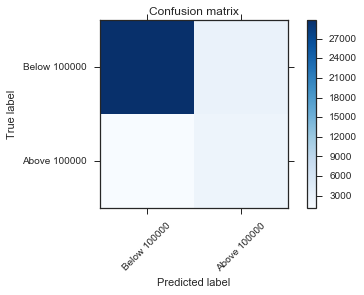

In [90]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', clf), ('lda', clf2), ('qda', clf3),('svc',mod)], voting='hard')
eclf.fit(X_train, y_train)
run_model(eclf)

In [92]:
from sklearn.ensemble import RandomForestClassifier

[[27720  5212]
 [  758  3025]]
Below 100000 Acc: 0.8417344831774566
Above 100000 Acc: 0.7996299233412636
Avg Acc: 0.8206822032593601
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


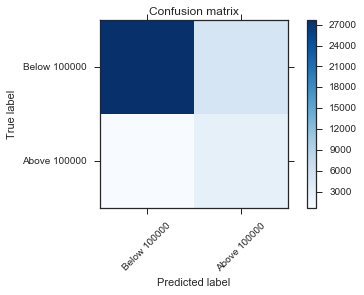

In [95]:
model = RandomForestClassifier()
parameters = {'n_estimators':[100], 'max_depth':[10], 'max_features': ['log2'], 'class_weight':['balanced']}
clf5 = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
clf5.fit(X_train, y_train)
run_model(clf5.best_estimator_)
print(clf5.best_estimator_)

/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/qldo18/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables ar

[[28201  4731]
 [  782  3001]]
Below 100000 Acc: 0.8563403376654926
Above 100000 Acc: 0.7932857520486386
Avg Acc: 0.8248130448570656


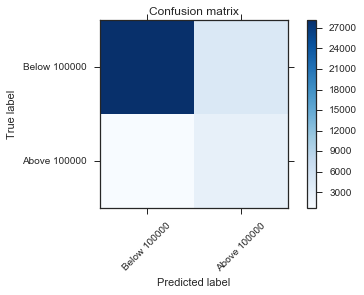

In [98]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', clf), ('lda', clf2), ('qda', clf3),('svc',mod),('tree', clf5)], voting='hard')
eclf.fit(X_train, y_train)
run_model(eclf)